# Week 04

# Task 1

In this task you will implement and train a multi layer perceptron (MLP) model using Gradient Descent and back propagation algorithms. The model should have 4 neurons with ReLu activation function in the hidden layer (Layer 1) and a single neuron with Sigmoid activation fuction in the output layer (Layer 2). The MLP will be applied to solve the binary classification problem from the previous practicals. 

**1. Loading the data.** 

The first two columns are the feature variables and the last column in the target output.

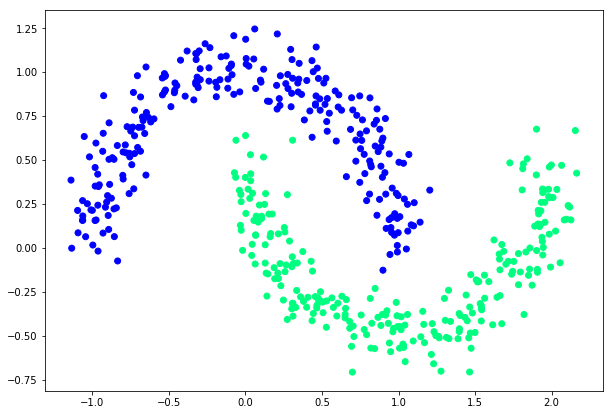

In [17]:
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
import matplotlib.pyplot as plt

x, y = datasets.make_moons(500, noise=0.1)
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.winter)

***
**2. Implementing batch Greadient Descent with backpropagation.**

- Split the dataset into test and train set, with the split 0.2 for the test set.
- Implement the activation functions and their derivatives.
- Implement loss function and its derivative. 
- Initialize weights with uniform distribution (-1,1) and biases with zero values.
- Train the Neural Network with Batch GD algorithm and the train set. Use 0.05 as learning rate.
- Train the model for 1000 epochs.
- Visualise train and test error and accuracy across the epochs.
- Report the final test accuracy of the model.


Reshaping the label vector.

In [18]:
#data preprocessing
y=y.reshape(len(y),1)

Splitting dataset int train/test sets.

In [19]:
from sklearn.model_selection import train_test_split

#spliting data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0, shuffle=True)
x_train.shape
y_train.shape

(400, 1)

Implement the sigmoid and ReLu activation functions and their derivatives.

In [20]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

def sigmoid_der(v):
    return sigmoid(v)*(1-sigmoid(v))

def reLu(v):
    return np.maximum(v,0)

def reLu_der(v):
    v[v<=0] = 0
    v[v>0] = 1
    return v

In [21]:
reLu(np.array([-1,2,3]))

array([0, 2, 3])

In [22]:
np.array([[1,2,3],[-1,2,3]])

array([[ 1,  2,  3],
       [-1,  2,  3]])

Implementing loss function and its derivative.

In [23]:
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

def crossEntrDeriv(o,y):
    return -(y/o - (1-y)/(1-o))

Training Neural Network model with Batch Gradient Descent.

Initializing weights:

- The weights of Layer 1 ($w_1$) are represented as a matrix of size [no of inputs, no of neurons in Layer 1] and the bias ($b_1$) is a vector with dimension equals to the number of neurons in Layer 1. 
- The weights of Layer 2 ($w_2$) are represented by a matrix of shape [no of output from Layer 1, no of neurons in Layer 2] and the bias is a vector with dimenssion equals to te number of neurons in Layer 2.

Forward pass:
From the lecture we know that:
- Input to Layer 1: $in_1 = x@w_1+b_1$ 
- Output of Layer 1: $o_1=ReLu(in_1)$
- Input to Layer 2: $in_2=o_1@w_2+b_2$
- Output of Layer 2: $o_2 = \frac{1}{1+e^{-in_2}}$ 

Calculating gradients:

$k - $batch size

Layer 2:
$$\frac{\delta E}{\delta w_2} = \frac{\delta E}{\delta o_2}\times\frac{\delta o_2}{\delta in_2}\times\frac{\delta in_2}{\delta w_2} = \frac{1}{k}*o_1.T@(\frac{\delta E}{\delta o_2}*\frac{\delta o_2}{\delta in_2})$$
    
$$\frac{\delta E}{\delta b_2} = \frac{\delta E}{\delta o_2}\times\frac{\delta o_2}{\delta in_2}\times\frac{\delta in_2}{\delta b_2} = \frac{1}{k}*\overrightarrow{1_{[1,k]}}@(\frac{\delta E}{\delta o_2}*\frac{\delta o_2}{\delta in_2})$$

Layer 1:

$$\frac{\delta E}{\delta w_1} = \frac{\delta E}{\delta o_2}\times \frac{\delta o_2}{\delta in_2}\times \frac{\delta in_2}{\delta o_1}\times \frac{\delta o_1}{\delta in_1} \times \frac{\delta in_1}{\delta w_1} = \frac{1}{k}*x_1.T@ (\frac{\delta E}{\delta o_2}*\frac{\delta o_2}{\delta in_2} @ w_2.T)* \frac{\delta o_1}{\delta in_1}$$

$$\frac{\delta E}{\delta b_1} = \frac{\delta E}{\delta o_2}\times \frac{\delta o_2}{\delta in_2}\times \frac{\delta in_2}{\delta o_1}\times \frac{\delta o_1}{\delta in_1} \times \frac{\delta in_1}{\delta b_1} = \frac{1}{k}*\overrightarrow{1_{[1,k]}}@ (\frac{\delta E}{\delta o_2}*\frac{\delta o_2}{\delta in_2} @ w_2.T)* \frac{\delta o_1}{\delta in_1}$$

where:


$\frac{\delta E}{\delta o_2} = \frac{\delta crossEntrop}{\delta o_2}$

$\frac{\delta o_2}{\delta in_2}=\frac{\delta Sigmoid}{\delta in_2}$

$\frac{\delta o_1}{\delta in_1} = \frac{\delta ReLu}{\delta in_1}$


Final Accuracy:  0.86


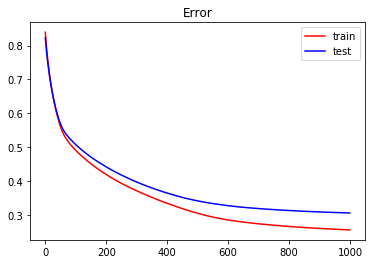

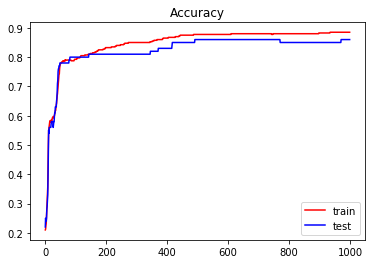

In [24]:
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(42)
w1 = np.random.uniform(-1,1,[len(x[0]),4]) #weights of the first layer
b1 = np.zeros([1,4]) #bias of the first layer
w2 = np.random.uniform(-1,1,[4,1]) #weights of the first layer
b2 = 0 #bias of the first layer
l = 0.05
epochs = 1000

train_E = []
test_E = []
train_Acc = []
test_Acc = []

for epoch in range(epochs):  
    #feedforward
    in1 = x_train@w1 + b1
    o1 = reLu(in1)
    in2 = o1@w2 + b2
    o2 = sigmoid(in2)
    error = crossEntrop(o2 ,y_train).mean()
    
    #Evaluation
    #Error
    train_E.append(error)
    test_E.append(crossEntrop(sigmoid(reLu(x_test@w1+b1)@w2+b2),y_test).mean())
    #Accuracy
    pred_train = np.where(o2 > 0.5, 1,0)
    pred_test = np.where(sigmoid(reLu(x_test@w1+b1)@w2+b2) > 0.5,1,0)
    train_Acc.append(metrics.accuracy_score(y_train,pred_train))
    test_Acc.append(metrics.accuracy_score(y_test,pred_test))
    
    #backpropagation Layer 2
    dE_dO2 = crossEntrDeriv(o2, y_train)
    dO2_dIn2 = sigmoid_der(in2)
    dIn2_dW2 = o1
    dIn2_B2 = 1
    dE_dW2 = (1/x_train.shape[0])*o1.T@(dE_dO2*dO2_dIn2)
    dE_dB2 = (1/x_train.shape[0])*np.ones([1,len(x_train)])@(dE_dO2*dO2_dIn2)
    
    #backpropagation Layer 1
    dIn2_dO1 = w2
    dO1_dIn1 = reLu_der(in1)
    dIn1_dW1 = x_train
    dE_dW1 = (1/x_train.shape[0])*x_train.T@((dE_dO2*dO2_dIn2@w2.T)*dO1_dIn1)
    dE_dB1 = (1/x_train.shape[0])*np.ones([len(x_train)])@((dE_dO2*dO2_dIn2@w2.T)*dO1_dIn1)
    
    #updating parameters
    b2-=l*dE_dB2
    w2-=l*dE_dW2
    b1-=l*dE_dB1
    w1-=l*dE_dW1

print('Final Accuracy: ', metrics.accuracy_score(y_test,np.where(sigmoid(reLu(x_test@w1+b1)@w2+b2) > 0.5,1,0)))    
    
z=np.arange(epochs)
f1=plt.figure(1)
plt.plot(z,train_E,label="train",color='red')
plt.plot(z,test_E,label="test",color='blue')
plt.legend(loc='best')
plt.title('Error')
f1.show()

f2=plt.figure(2)
plt.plot(z,train_Acc,label="train",color='red')
plt.plot(z,test_Acc,label="test",color='blue')
plt.legend(loc='best')
plt.title('Accuracy')
f2.show()

# Task 2

In this taks you should implement a MLP model and train it with the 'Breast Cancer' dataset from [sklearn](https://scikit-learn.org/stable/datasets/index.html) library. Evaluate your model using 10 cross validation. Report the average accuracy of the model accross all folds. You can experiment with different architectures of the Neural Network.

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold

x,y = load_breast_cancer(return_X_y = True)

x = preprocessing.MinMaxScaler().fit_transform(x)
y=y.reshape(len(y),1)
kf = KFold(n_splits=10, shuffle=True)
np.random.seed(42)

l = 0.05
epochs = 1000
L1 = 5 #number of neurons in hidden layer
test_Acc = []

for train_index, test_index in kf.split(x):
    w1 = np.random.uniform(-1,1,[len(x[0]),L1]) #weights of the first layer
    b1 = np.zeros([1,L1]) #bias of the first layer
    w2 = np.random.uniform(-1,1,[L1,1]) #weights of the first layer
    b2 = 0 #bias of the first layer
    
    for epoch in range(epochs):  
        #feedforward
        in1 = x[train_index]@w1 + b1
        o1 = reLu(in1)
        in2 = o1@w2 + b2
        o2 = sigmoid(in2)
        error = crossEntrop(o2 ,y[train_index]).mean()

        #backpropagation Layer 2
        dE_dO2 = crossEntrDeriv(o2, y[train_index])
        dO2_dIn2 = sigmoid_der(in2)
        dIn2_dW2 = o1
        dIn2_B2 = 1
        dE_dW2 = (1/x[train_index].shape[0])*o1.T@(dE_dO2*dO2_dIn2)
        dE_dB2 = (1/x[train_index].shape[0])*np.ones([1,len(x[train_index])])@(dE_dO2*dO2_dIn2)

        #backpropagation Layer 1
        dIn2_dO1 = w2
        dO1_dIn1 = reLu_der(in1)
        dIn1_dW1 = x[train_index]
        dE_dW1 = (1/x[train_index].shape[0])*x[train_index].T@((dE_dO2*dO2_dIn2@w2.T)*dO1_dIn1)
        dE_dB1 = (1/x[train_index].shape[0])*np.ones([len(x[train_index])])@((dE_dO2*dO2_dIn2@w2.T)*dO1_dIn1)

        #updating parameters
        b2-=l*dE_dB2
        w2-=l*dE_dW2
        b1-=l*dE_dB1
        w1-=l*dE_dW1

    #Accuracy
    pred_test = np.where(sigmoid(reLu(x[test_index]@w1+b1)@w2+b2) > 0.5,1,0)
    test_Acc.append(metrics.accuracy_score(y[test_index],pred_test))

print('Final Accuracy: ', sum(test_Acc)/len(test_Acc))

Final Accuracy:  0.9613721804511279
